# 8. Нелинейные модели для классификации. Выбор лучшей модели для классификации. Построение программного конвеера

In [ ]:
import os
import numpy as np
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

#k-Nearest Neighbors

In [ ]:
dataframe = read_csv("/content/heart.csv")
dataframe.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

In [ ]:
# KNN Classification
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())
print(results.std())

0.6605376344086021
0.09713201470537967


In [ ]:
model.fit(X,Y)

KNeighborsClassifier()

In [ ]:
x_new=np.array([[56,1,2,140,230,0,0,130,0,2,0,0,1],[6,1,2,140,30,0,0,13,0,2,0,0,1]])

In [ ]:
model.predict(x_new)

array([0., 0.])

#Naive Bayes

In [ ]:
# Gaussian Naive Bayes Classification
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8054838709677419


In [ ]:
model.fit(X,Y)

GaussianNB()

In [ ]:
model.predict(x_new)

array([0., 0.])

In [ ]:
model.predict_proba(x_new)

array([[0.82074182, 0.17925818],
       [0.96015563, 0.03984437]])

#Classification and Regression Trees

In [ ]:
# CART Classification
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7561290322580646


In [ ]:
model.fit(X,Y)

DecisionTreeClassifier()

In [ ]:
model.predict(x_new)

array([1., 1.])

In [ ]:
model.predict_proba(x_new)

array([[0., 1.],
       [0., 1.]])

#Выбор лучшего алгоритма машинного обучения для задачи классификации#

In [ ]:
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.828817 (0.114003)
LDA: 0.841935 (0.111365)
KNN: 0.660538 (0.097132)
CART: 0.759355 (0.120363)
NB: 0.805484 (0.108946)
SVM: 0.653656 (0.111929)


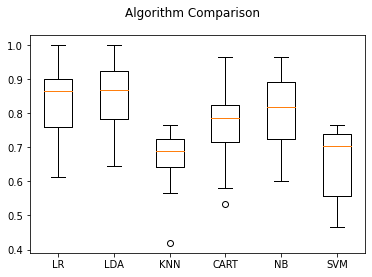

In [ ]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()